# ECO462: Homework 2

In [8]:
# Basic Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Section A: Expected Returns, Standard Deviations and Correlations

In [1]:
# Question 1 & 2 Coding Portion

assets = ["A1", "A2", "A3"]
sigma = "\u03C3"
prob = np.array([.35,.45,.20])
data = {
  "S1": [.15,.06,.12],
  "S2": [.03,.12,.08],
  "S3": [-.05,-.14,-.10]
}
sample_stats = {
  "E[R]": [],
  sigma: []
}

df_scenerios = pd.DataFrame(data)

def weighted_standard_deviation(prob: list, ev: list, df):
  n_rows, n_cols = df.shape
  
  weighted_std = []
  for j in range(n_rows):
    var_j = 0
    for i in range(n_cols):
      var_j += prob[i]*((df.iloc[j,i]-ev[j]) ** 2)
    weighted_std.append(np.sqrt(var_j))
  return weighted_std

for i in range(3):
  sample_stats["E[R]"].append(np.average(df_scenerios.iloc[i].to_numpy(),weights=prob))

sample_stats[sigma] = weighted_standard_deviation(prob,sample_stats["E[R]"],df_scenerios)

df_scenerio_stats = pd.DataFrame(sample_stats, index=assets)
print(df_scenerio_stats)

NameError: name 'np' is not defined

In [ ]:
# Question 3 Coding Portion

centered = (df_scenerios.sub(sample_stats["E[R]"], axis=0).to_numpy())

covar_matrix = centered @ np.diag(prob) @ centered.T
corr_list = [covar_matrix[0,1] / (df_scenerio_stats[sigma][0]*df_scenerio_stats[sigma][1]), 
             covar_matrix[0,2] / (df_scenerio_stats[sigma][0]*df_scenerio_stats[sigma][2]), 
             covar_matrix[1,2] / (df_scenerio_stats[sigma][1]*df_scenerio_stats[sigma][2])]
corr_list = [float(x) for x in corr_list]
print(f"Corr_A1,A2: {corr_list[0]:.6f}\nCorr_A1,A3: {corr_list[1]:.6f}\nCorr_A2,A3: {corr_list[2]:.6f}")


Corr_A1,A2: 0.484424
Corr_A1,A3: 0.843672
Corr_A2,A3: 0.878357


/var/folders/jq/xrjztt6s5zb6d4kz4r8cxdm00000gn/T/ipykernel_87925/3447333243.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_list = [covar_matrix[0,1] / (df_scenerio_stats[sigma][0]*df_scenerio_stats[sigma][1]),
/var/folders/jq/xrjztt6s5zb6d4kz4r8cxdm00000gn/T/ipykernel_87925/3447333243.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  covar_matrix[0,2] / (df_scenerio_stats[sigma][0]*df_scenerio_stats[sigma][2]),
/var/folders/jq/xrjztt6s5zb6d4kz4r8cxdm00000gn/T/ipykernel_87925/3447333243.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

In [ ]:
# Question 4 Coding Portion
p_w = np.array([.2,.4,.4])
q_w = np.array([.5,.3,.2])

p_ev = np.average(df_scenerio_stats["E[R]"].to_numpy(), weights=p_w)
q_ev = np.average(df_scenerio_stats["E[R]"].to_numpy(), weights=q_w)

p_var = np.sqrt(p_w.T @ covar_matrix @ p_w)
q_var = np.sqrt(q_w.T @ covar_matrix @ q_w)

print(f"Portfolio p's E[R]: {p_ev}")
print(f"Portfolio q's E[R]: {q_ev}")

print(f"Portfolio p's {sigma}: {p_var}")
print(f"Portfolio q's {sigma}: {q_var}")

p_scenerios =  p_w @ df_scenerios
p_centered = (p_scenerios - p_ev).to_numpy()

q_scenerios = q_w @ df_scenerios
q_centered = (q_scenerios - q_ev).to_numpy()

pq_covar = p_centered.T @ np.diag(prob) @ q_centered
print(f"Correlation: {pq_covar / (p_var * q_var)}")

Portfolio p's E[R]: 0.0532
Portfolio q's E[R]: 0.0537
Portfolio p's σ: 0.07991595585363415
Portfolio q's σ: 0.07376523571439327
Correlation: 0.9766481985230003


### Question 5 Written Portion
Mean-variance domination dictates that portfolio q dominates portfolio p, since portfolio q's expected return is **higher** than portfolio p's and portfolio q's variance is **lower** than portfolio p's. 

## Section B: Rates of Returns on Portfolios

In [12]:
# Question 1 Coding Portion

AB_weights = [.35,.65]
AB_corr = [.6,-.4]
AB_stats = {
  "E[R]": [.05,.07],
  sigma: [.15,.21],
}

df_AB_stats = pd.DataFrame(AB_stats)

covar_1 = AB_stats[sigma][0] * AB_stats[sigma][1] * AB_corr[0]
covar_2 = AB_stats[sigma][0] * AB_stats[sigma][1] * AB_corr[1]

# Increase modularity at some point
portfolios = {
  "E[R]": [np.average(AB_stats["E[R]"], weights = AB_weights),np.average(AB_stats["E[R]"], weights = AB_weights)],
  sigma: [np.sqrt(((.35 ** 2) * (AB_stats[sigma][0]) ** 2) + ((.65 ** 2) * (AB_stats[sigma][1]) ** 2) + (2 * (.35) * (.65) * (covar_1))),np.sqrt(((.35 ** 2) * (AB_stats[sigma][0]) ** 2) + ((.65 ** 2) * (AB_stats[sigma][1]) ** 2) + (2 * (.35) * (.65) * (covar_2)))]
}
df_portfolios = pd.DataFrame(portfolios, index = ["Portfolio 1", "Portfolio 2"])
print(df_portfolios)

              E[R]         σ
Portfolio 1  0.063  0.173170
Portfolio 2  0.063  0.125122


In [13]:
# Question 2 Coding Portion

# See attached written portion at the beginning of the PSET for the derivation of this equation

var_A = AB_stats[sigma][0] ** 2
var_B = AB_stats[sigma][1] ** 2

weight_coefficient_neg = [var_B,
                      2* ((AB_stats[sigma][0] * AB_stats[sigma][1] * -1) - (var_B)),
                      ((var_A) + (var_B) - (2 * AB_stats[sigma][0] * AB_stats[sigma][1] * -1))]
p1 = np.polynomial.Polynomial(weight_coefficient_neg)
roots1 = p1.roots()
print(f"The porfolio of stocks with no variance and a correlation of -1 is:\n\nWeight of Stock A: {roots1[0]:.4f}\nWeight of Stock B: {1-roots1[0]:.4f}\n")

weight_coefficient_pos = [var_B,
                      2* ((AB_stats[sigma][0] * AB_stats[sigma][1]) - (var_B)),
                      ((var_A) + (var_B) - (2 * AB_stats[sigma][0] * AB_stats[sigma][1]))]
p2 = np.polynomial.Polynomial(weight_coefficient_pos)
roots2 = p2.roots()

print(f"The porfolio of stocks with no variance and a correlation of 1 is:\n\nWeight of Stock A: {roots2[0]:.4f}\nWeight of Stock B: {1-roots2[0]:.4f}")

The porfolio of stocks with no variance and a correlation of -1 is:

Weight of Stock A: 0.5833
Weight of Stock B: 0.4167

The porfolio of stocks with no variance and a correlation of 1 is:

Weight of Stock A: 3.5000
Weight of Stock B: -2.5000


### Question 2 Written Portion

Essentially, the second portfolio can be the same given the condition that shorting is allowed. \nIn that case, you would short a proportional weight of 2.5 of Stock B and buy a weight of 3.5 in Stock A, to achieve the desired portfolio. If short selling were not allowed, then it would be impossible to create this portfolio since the weights are derived from a perfect square and therefore only a single weight with the given constraints exists.

For E[R] = 0.04, the STD is: 0.2483
For E[R] = 0.05, the STD is: 0.1500
For E[R] = 0.06, the STD is: 0.1290
For E[R] = 0.07, the STD is: 0.2100
For E[R] = 0.08, the STD is: 0.3238
For E[R] = 0.09, the STD is: 0.4460
For E[R] = 0.1, the STD is: 0.5712


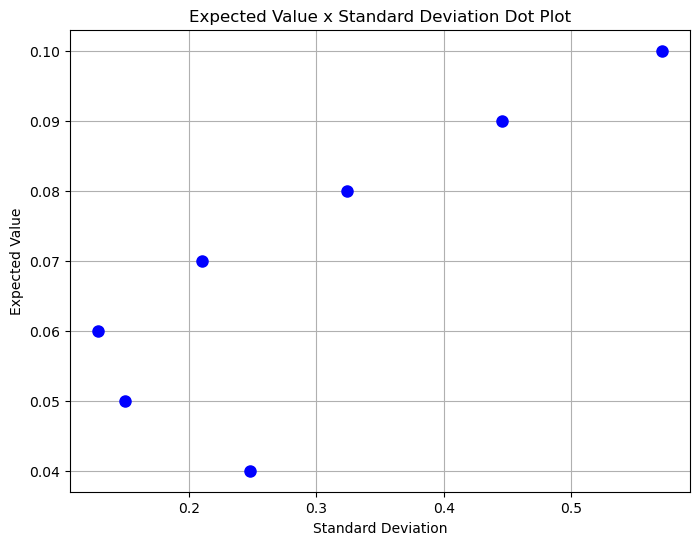

In [14]:
# Question 3 Coding Portion

pairs = []
evs = [.04,.05,.06,.07,.08,.09,.10]
A_ev = AB_stats["E[R]"][0]
B_ev = AB_stats["E[R]"][1]

def weight_std(expected_values:list):
  for i in range(len(expected_values)):
    w = -((B_ev-expected_values[i])/(B_ev-A_ev))
    std = np.sqrt((var_A+var_B)*(w**2) + 2 * w * var_B + var_B)

    print(f"For E[R] = {expected_values[i]}, the STD is: {std:.4f}")

    pairs.append([expected_values[i],std])

weight_std(evs)

y, x = zip(*pairs)

plt.figure(figsize=(8,6))
plt.plot(x, y,'o', markersize=8, color='blue', label='Data Points')
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Value")
plt.title("Expected Value x Standard Deviation Dot Plot")
plt.grid(True)
plt.show()


### Question 4 Written Portion

Consider the case that asset A and asset C are perfectly correlated. Then, it follows that both asset A and asset C can be uncorrelated with asset B whilst having a mutual non-zero correlation (in fact, where the correlation between asset A and asset C is 1).

## Section C: Asset Allocation



### Question 1 Written Portion

The reasoning is poor because Investor X is foregoing the diversification effect that would allow her to achieve the same level of returns as investing solely in Asset A while having lower risk (as measured by standard deviation). Notice how the market portfolio bar chart shows that there is some amount of Asset B and a larger amount of Asset A. The market portfolio is the optimal proportion of the constituent assets as to maximize expected return and minimize variance, such that a higher return could be achieved simply by levering the portfolio.

The diversification effect is also visible by the parabolic / hyperbolic shape of the efficient fronter, indicating that the leftmost and highest point on the efficient frontier is solely Asset A. However, if you trace the CAL according to the tangency portfolio, you can achieve a higher level of return for the same risk.

However, if Investor X chooses not to invest in the risk free asset, it is plausible, given the avaliability of short selling, to only invest in Asset A and Asset B, which is seen by the optimal portfolio on the diagram.

See the attached Excel sheet for the relevant diagram.

### Question 2 Written Portion

The statement is false. Even though their levels of risk aversion differ, the market porfolio has a set distribution and proportion of Asset A and Asset B that should be fixed for all investors, regardless of risk aversion level. The market portfolio is determined to be the best ratio of assets in terms of balancing expected return and standard deviation, and theoretically all investors should utilize the weights provided by the tagency portfolio indicated by the point of tangency between the capital allocation line and the efficient frontier. Rather, the only thing that should feasibly change is the proportion of the market porfolio as a whole they invest in compared to the provided risk-free asset.

## Section D: More Asset Allocation

### Question 1 Written Portion

Generally, γ tends to increase with age and tends to decrease relative to financial portfolio size, as intuitive when considering prospect theory and how the incremental increase of wealth matters less and therefore one's willingness to risk wealth increase (aligned with a decrease in risk aversion or γ).

The scoring worksheet properly reflects this as the calculations for the "age score" proportion of the risk metric decreases as you get older, through differing calculations per age range. Additionally, the score you put based on the size of your portfolio asl changes the risk metric as a higher financial portfolio size indicates increases the score. The worksheet seems to be calculating a "riskiness" metric rather than a risk aversion metric as scoring higher in the stocks category leads to a greater recommendation to hold a higher proportion of stocks in comparison to bonds, a safer alternative.

See the general movements of the indifference curves written above in the written section.

### Question 2 Written Portion

The question 1D attempts to assess is your perspective on the economy and what stage of the business cycle it is currently in. Weak most likely corresponds to a recession, average is perhaps general growth or stability, and strong is when the economy is rapidly growing or nearing a peak. Hence, based on the graph, it seems that the question does not properly prepare you for the anticipated changes in asset prices during each business cycle. For instance, if the economy is nearing its peak, it seems to indicate that you should purchase more stocks since observing the economy to be strong leads to a higher "riskiness" metric that leads to a greater position in stocks. However, this is a poor decision because for multiple proceeding stages of the business cycle, your stock price will fall in price and you would have been better of investing in a different asset. 

### Question 3 Written Portion

The question 2D is better suited for bonds, as the distribution of bonds lines up better with the suggestions from the worksheet. When you feel that the economy is not strong (i.e. is in a recession), it recommends you not to purchase bonds, which is in line with the diagram because it shows the bond premium peaking whereas you would want to purchase the asset prior to the peak so as to watch your asset grow to a higher point. Similarly, when the economy peaks, you should purchase bonds because then during the recession, the premia for bonds will grow and your assets will appreciate. Hence, in terms of bonds, the worksheet does a better job at aligning itself with the past trends of varying business cycles.

### Question 4 Written Portion

"What stage in the business cycle do you believe the economy to currently be in?"

**Selections**: Recession, Expansion, Peak, Trough

For 1D the peak should have a higher value (i.e. higher recommendation to have a higher weight in stocks) and steadily decline as it reaches the trough. For 2D the peak should have a lower value and the scores should trend in the opposite direction as the scores asigned to each selection for the stocks question.

## Section E: Efficient Frontier Computation

### Question 1

Refer to the worksheet for the efficient frontier and the CML with the five stocks from the first PSET

### Question 2 Written Portion

Increasing the correlation between assets tends to compress the efficient frontier, reducing diversification benefits and decreasing the slope of the Capital Market Line (CML). Conversely, introducing strong negative correlations between certain assets can shift the efficient frontier leftward, lowering portfolio risk for a given return. In scenarios where asset correlations are low or near zero, the CML generally steepens, reflecting higher potential risk-adjusted returns. Additionally, assets with higher risk levels tend to receive smaller allocations in the optimal portfolio due to their disproportionate contribution to total portfolio variance.

### Question 3 Written Portion

All the stocks lie southeast of the efficient frontier, indicating that there is a higher expected return for the given variance, or a lower variance for any expected return through combining in the assets in an efficient manner.

After adding the S&P500D, it's clear that it is the single investment that is closest to the efficient frontier, specifically towards the point of the minimum variance portfolio. Essentially, that means that the S&P500D has a better mean-variance trade off and that it does a good job of approximating an excellent portfolio. 

The implications for portfolio managers are immense, as it indicates that they are able to simply invest in the S&P500D and achieve returns that are comparable to a portfolio on the efficient frontier. In a practical, non-theoretical sense, this avoids a majority of transaction fees and active management fees that would eat into profits, thereby providing an excellent choice for investors and passive managers and putting pressure on active portfolio managers who be exceptional in some regard to beat the S&P500D.

### <u>*Statement of Collaboration (including ChatGPT)*</u>

I collaborated with **Rosalia Mwidege** and **Theodore Ouyang**. Additionally, **ChatGPT** was used to debug any error-prone code and find the proper Excel-equivalent Python functions and libraries to properly execute the solutions to the problems, in conjunction with the hints listed on the problem set.

### <u>*Honor Code*</u>
This assignment: represents my own work in accordance with University regulations and class policy.